In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# There are five stations, each stored on different sheets
# Download data for each station (remove first two rows as they do not contain data)
data_string = "hk25-AusNode-ExtremePrecipitation/Data/Stations/Fiji_Meteorological_Service/Daily Rainfall Data.xlsx"

suva_data = pd.read_excel(data_string, sheet_name='Suva_daily', skiprows=2, header=None)
lautoka_data = pd.read_excel(data_string, sheet_name='Lautoka_daily', skiprows=2, header=None)
savusavu_airport_data = pd.read_excel(data_string, sheet_name='Savusavu_Airport_daily', skiprows=2, header=None)
labasa_airport_data = pd.read_excel(data_string, sheet_name='Labasa_Airport_daily', skiprows=2, header=None)
penang_data = pd.read_excel(data_string, sheet_name='Penang_daily', skiprows=2, header=None)

In [3]:
# Update headers
suva_data.columns = ['date', 'daily_rainfall_mm','accumulation_period_days']
lautoka_data.columns = ['date', 'daily_rainfall_mm','accumulation_period_days']
savusavu_airport_data.columns = ['date', 'daily_rainfall_mm','accumulation_period_days']
labasa_airport_data.columns = ['date', 'daily_rainfall_mm','accumulation_period_days']
penang_data.columns = ['date', 'daily_rainfall_mm','accumulation_period_days']

In [4]:
# Check for duplicate dates
print(sum(suva_data.duplicated(subset=['date'])))
print(sum(lautoka_data.duplicated(subset=['date'])))
print(sum(savusavu_airport_data.duplicated(subset=['date'])))
print(sum(labasa_airport_data.duplicated(subset=['date'])))
print(sum(penang_data.duplicated(subset=['date'])))

# No duplicate dates

0
0
0
0
0


In [5]:
# Define the date range (same for all datasets)
start_date = '1990-01-01'
end_date = '2022-12-31'
date_range = pd.date_range(start=start_date, end=end_date)
# Check for missing dates
print(set(date_range) - set(suva_data['date']))
print(set(date_range) - set(lautoka_data['date']))
print(set(date_range) - set(savusavu_airport_data['date']))
print(set(date_range) - set(labasa_airport_data['date']))
print(set(date_range) - set(penang_data['date']))

# No missing dates 

set()
set()
set()
set()
set()


In [6]:
# For data points with a multi-day accumulation period, replace their inputs with NaN values
suva_data.loc[(suva_data.accumulation_period_days > 1), "daily_rainfall_mm"] = np.nan
lautoka_data.loc[(lautoka_data.accumulation_period_days > 1), "daily_rainfall_mm"] = np.nan
savusavu_airport_data.loc[(savusavu_airport_data.accumulation_period_days > 1), "daily_rainfall_mm"] = np.nan
labasa_airport_data.loc[(labasa_airport_data.accumulation_period_days > 1), "daily_rainfall_mm"] = np.nan
penang_data.loc[(penang_data.accumulation_period_days > 1), "daily_rainfall_mm"] = np.nan

In [7]:
# Check for blank rainfall records (to be aware of NaN dates)
suva_data[np.isnan(suva_data.daily_rainfall_mm) == True]

,date,daily_rainfall_mm,accumulation_period_days
8400,2012-12-31,NaN,NaN
9328,2015-07-17,NaN,NaN
9329,2015-07-18,NaN,NaN
9952,2017-04-01,NaN,NaN
10209,2017-12-14,NaN,NaN
10210,2017-12-15,NaN,2.0
10231,2018-01-05,NaN,1.0
10232,2018-01-06,NaN,1.0
10233,2018-01-07,NaN,1.0
10274,2018-02-17,NaN,NaN


In [8]:
lautoka_data[np.isnan(lautoka_data.daily_rainfall_mm) == True]

,date,daily_rainfall_mm,accumulation_period_days
7369,2010-03-06,NaN,NaN
7370,2010-03-07,NaN,NaN
7831,2011-06-11,NaN,NaN
7854,2011-07-04,NaN,1.0
7864,2011-07-14,NaN,1.0
7865,2011-07-15,NaN,1.0
7866,2011-07-16,NaN,1.0
7879,2011-07-29,NaN,1.0
9546,2016-02-20,NaN,NaN
10325,2018-04-09,NaN,NaN


In [9]:
savusavu_airport_data[np.isnan(savusavu_airport_data.daily_rainfall_mm) == True]

,date,daily_rainfall_mm,accumulation_period_days
396,1991-02-01,NaN,NaN
397,1991-02-02,NaN,NaN
398,1991-02-03,NaN,NaN
399,1991-02-04,NaN,NaN
400,1991-02-05,NaN,NaN
...,...,...,...
11746,2022-02-28,NaN,NaN
11817,2022-05-10,NaN,NaN
11913,2022-08-14,NaN,NaN
11941,2022-09-11,NaN,NaN


In [11]:
labasa_airport_data[np.isnan(labasa_airport_data.daily_rainfall_mm) == True]

,date,daily_rainfall_mm,accumulation_period_days
8278,2012-08-31,NaN,NaN
8279,2012-09-01,NaN,NaN
8280,2012-09-02,NaN,NaN
8281,2012-09-03,NaN,NaN
8282,2012-09-04,NaN,NaN
...,...,...,...
11632,2021-11-06,NaN,NaN
11633,2021-11-07,NaN,NaN
11634,2021-11-08,NaN,NaN
11639,2021-11-13,NaN,NaN


In [12]:
penang_data[np.isnan(penang_data.daily_rainfall_mm) == True]

,date,daily_rainfall_mm,accumulation_period_days
244,1990-09-02,NaN,NaN
2781,1997-08-13,NaN,NaN
2782,1997-08-14,NaN,NaN
6275,2007-03-08,NaN,NaN
8974,2014-07-28,NaN,NaN
9207,2015-03-18,NaN,1.0
9546,2016-02-20,NaN,NaN
9548,2016-02-22,NaN,NaN
9589,2016-04-03,NaN,NaN
9590,2016-04-04,NaN,NaN


In [13]:
# Use record daily rainfall from BOM to check values above, and also check for negative rainfall values

# Check no negative rainfall values according to min value = 0
# Maximum rainfall ever recorded in a 24h period was 1,825mm in Foc Foc, La Réunion on 7-8 Jan 1966
# http://www.bom.gov.au/water/designRainfalls/rainfallEvents/worldRecRainfall.shtml
# Check maximum does not exceed this according to max value = 272mm
print("Suva maximum rainfall and negative/maximum rainfall checks")
print(min(suva_data.daily_rainfall_mm) < 0)
print(max(suva_data.daily_rainfall_mm))
print(max(suva_data.daily_rainfall_mm) > 1825)
print("Lautoka maximum rainfall and negative/maximum rainfall checks")
print(min(lautoka_data.daily_rainfall_mm) < 0)
print(max(lautoka_data.daily_rainfall_mm))
print(max(lautoka_data.daily_rainfall_mm) > 1825)
print("Savusavu airport maximum rainfall and negative/maximum rainfall checks")
print(min(savusavu_airport_data.daily_rainfall_mm) < 0)
print(max(savusavu_airport_data.daily_rainfall_mm))
print(max(savusavu_airport_data.daily_rainfall_mm) > 1825)
print("Labasa airport maximum rainfall and negative/maximum rainfall checks")
print(min(labasa_airport_data.daily_rainfall_mm) < 0)
print(max(labasa_airport_data.daily_rainfall_mm))
print(max(labasa_airport_data.daily_rainfall_mm) > 1825)
print("Penang maximum rainfall and negative/maximum rainfall checks")
print(min(penang_data.daily_rainfall_mm) < 0)
print(max(penang_data.daily_rainfall_mm))
print(max(penang_data.daily_rainfall_mm) > 1825)

Suva maximum rainfall and negative/maximum rainfall checks
False
272.0
False
Lautoka maximum rainfall and negative/maximum rainfall checks
False
390.6
False
Savusavu airport maximum rainfall and negative/maximum rainfall checks
False
243.0
False
Labasa airport maximum rainfall and negative/maximum rainfall checks
False
272.4
False
Penang maximum rainfall and negative/maximum rainfall checks
False
450.4
False


<Axes: xlabel='date'>

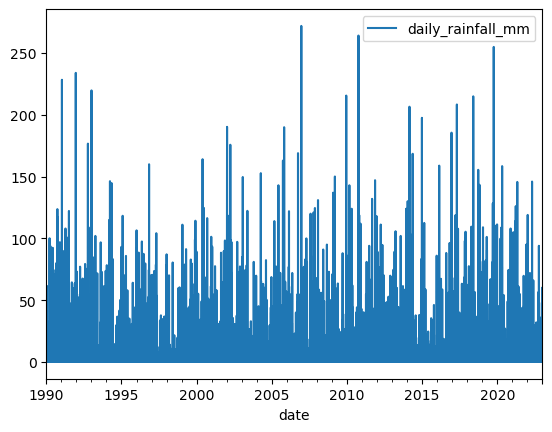

In [14]:
suva_data.plot('date', 'daily_rainfall_mm')

<Axes: xlabel='date'>

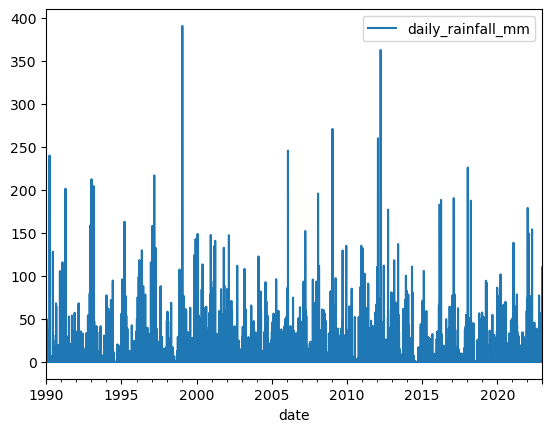

In [15]:
lautoka_data.plot('date', 'daily_rainfall_mm')

<Axes: xlabel='date'>

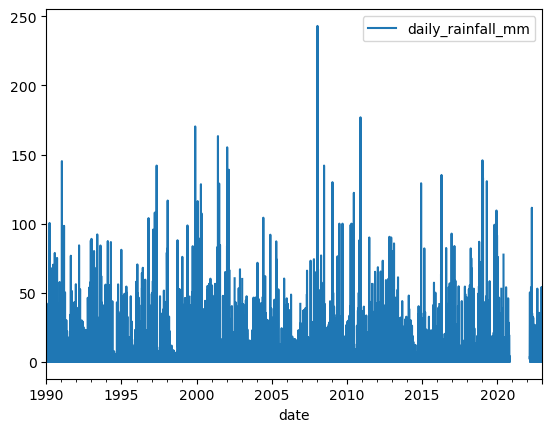

In [16]:
savusavu_airport_data.plot('date', 'daily_rainfall_mm')

<Axes: xlabel='date'>

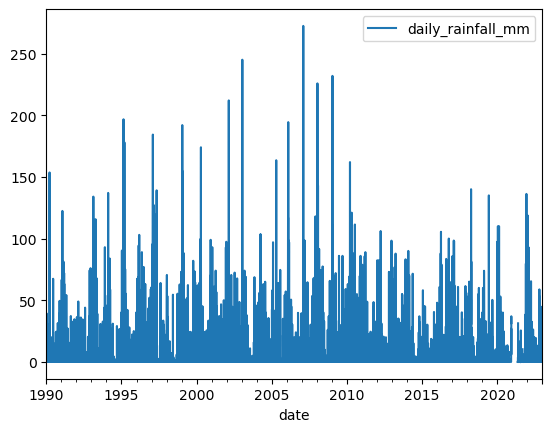

In [17]:
labasa_airport_data.plot('date', 'daily_rainfall_mm')

<Axes: xlabel='date'>

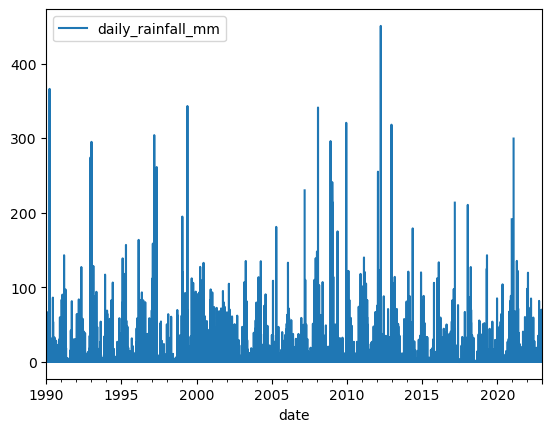

In [18]:
penang_data.plot('date', 'daily_rainfall_mm')

In [ ]:
# Save data
suva_data.to_csv('hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/suva_daily.csv', index=False)
lautoka_data.to_csv('hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/lautoka_daily.csv', index=False)
savusavu_airport_data.to_csv('hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/savusavu_airport_daily.csv', index=False)
labasa_airport_data.to_csv('hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/labasa_airport_daily.csv', index=False)
penang_data.to_csv('hk25-AusNode-ExtremePrecipitation/Data/Processed/Fiji/penang_daily.csv', index=False)

In [ ]:
# Boxplot
# suva_data.boxplot(column='daily_rainfall_mm')
# Where outliers exist, check flooding reports

In [ ]:
# Repeat sense checks of records based on monthly and annual data totals

In [ ]:
## Function written to split 
## Write a function to check that the days before store NaN values where the accumulation_period_days > 1
#def splitting_accumulation(data):
#    for ind in data[data.accumulation_period_days > 1].index:
#        days = data[data.accumulation_period_days > 1].accumulation_period_days[ind]
#        print(np.isnan((data[ind - int(days-1):ind]).daily_rainfall_mm))
#        rainfall_data = data[data.accumulation_period_days > 1].daily_rainfall_mm[ind]
#        data.loc[ind - int(days-1):ind+1, "daily_rainfall_mm"] = rainfall_data/days
#    return data